<a href="https://colab.research.google.com/github/salwazpw/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**3 - Structuring Element Dilasi (SED) berbentuk cross 3 x 3**

Secara Manual dengan looping tanpa menggunakan Library morphology dari openCV

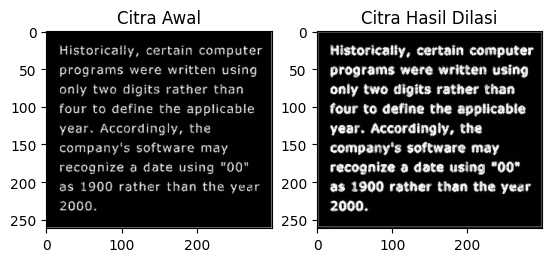

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')
def dilasi(img):
    # inisialisasi kernel
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

    # inisialisasi citra hasil dilasi dengan nilai nol
    dilation = np.zeros_like(img)

    # ukuran citra dan kernel
    m, n = img.shape
    k, l = kernel.shape
    pad_h, pad_w = k//2, l//2

    # melakukan operasi dilasi
    for i in range(pad_h, m-pad_h):
        for j in range(pad_w, n-pad_w):
            temp = img[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            temp = temp * kernel
            dilation[i, j] = np.max(temp)

    return dilation

# membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)

# melakukan dilasi
dilated_img = dilasi(img)

# menampilkan citra asli dan hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(1, 2, 2), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()


**4 - Structuring Element Dilasi (SED) berbentuk cross 3 x 3**

Menggunakan Library cv.dilate dari OpenCV

[[0 1 0]
 [1 1 1]
 [0 1 0]]


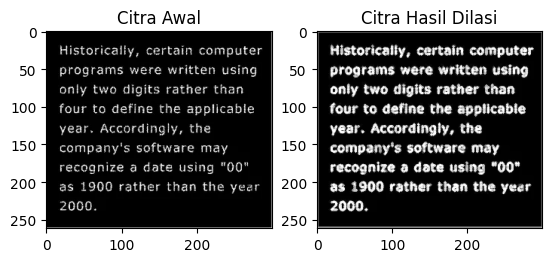

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
dilation = cv.dilate(img, kernel, iterations = 1)

print(kernel)
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.show()

**5 - Structuring Element Erosi (SE) berbentuk square 5 x 5**

Secara Manual dengan looping tanpa menggunakan Library morphology dari openCV

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


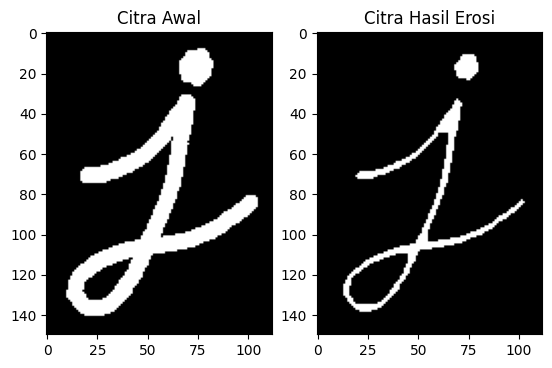

In [ ]:
# Membaca citra
img2 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('Citra Awal')

# Inisialisasi ukuran kernel dan citra hasil erosi
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
erosion = np.zeros_like(img2)

# Konstanta padding
constant = (kernel_size - 1) // 2

# Operasi erosi
for i in range(constant, img2.shape[0] - constant):
    for j in range(constant, img2.shape[1] - constant):
        temp = img2[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * kernel
        erosion[i, j] = np.min(product)

# Menampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi')
print(kernel)
plt.show()


**6 - Structuring Element Erosi (SE) berbentuk square 5 x 5**

Menggunakan Library cv.erode dari OpenCV

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


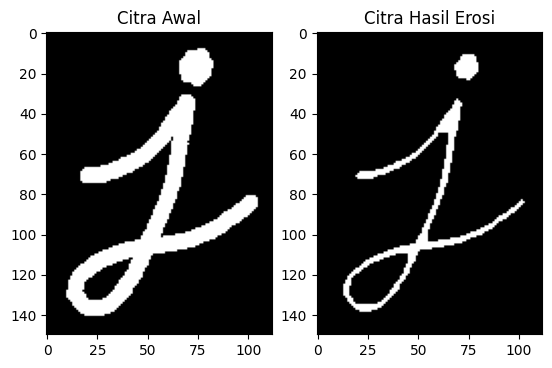

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
erosion = cv.erode(img2, kernel,iterations = 1)

print(kernel)
plt.subplot(121), plt.imshow(img2, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.show()

**7 - Operasi opening dengan Structuring Element berbentuk square 3 x 3**


Secara manual dengan looping tanpa library morphology dari OpenCV

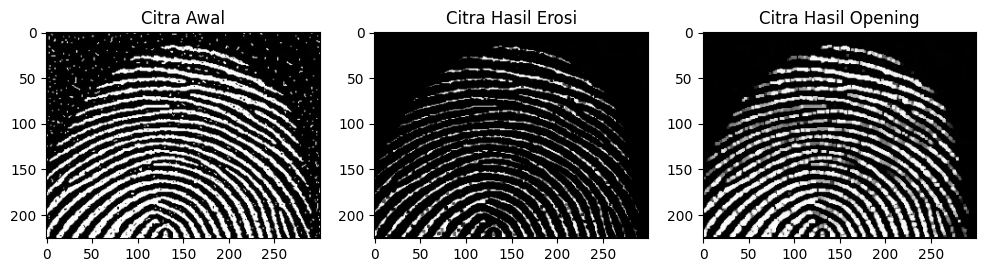

In [ ]:
# Load gambar
img3 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

#Acquire size of the image
m, n = img3.shape

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
erosi = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img3[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    erosi[i,j] = np.min(product)

#Acquire size of the image
p, q= erosi.shape

#Define new image to store the pixels of dilated image
opening = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], 
                [1,1,1], 
                [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = erosi[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    opening[i,j] =np.max(product)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')
plt.show()

Menggunakan library morphology dari OpenVC

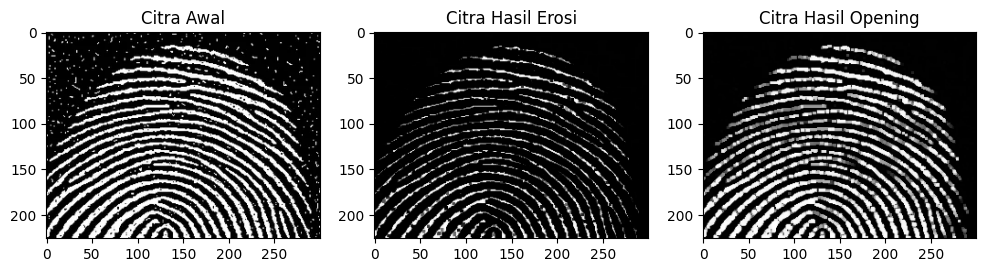

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Erosi
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img3, kernel, iterations=1)

# Opening
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img3, cv.MORPH_OPEN, kernel)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')

plt.show()

**8 - Operasi closing dengan Structuring Element berbentuk square 3 x 3**

Secara manual dengan looping tanpa library morphology dari OpenCV

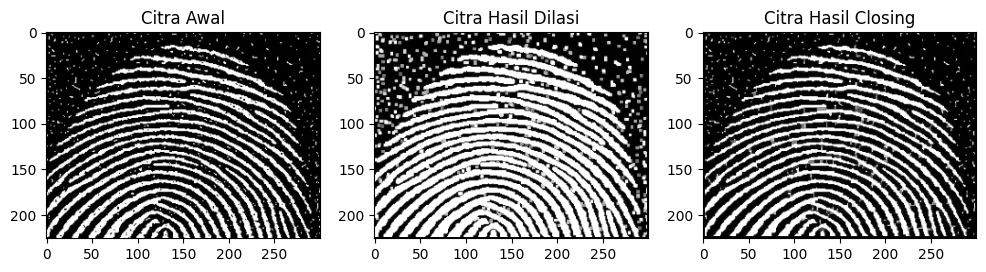

In [ ]:
# Load gambar
img4 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

#Acquire size of the image
p, q = img4.shape

#Define new image to store the pixels of dilated image
dilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], [1,1,1], [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img4[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    dilate[i,j] = np.max(product)

#Acquire size of the image
m, n= dilate.shape 

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
closing = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = dilate[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    closing[i,j] = np.min(product)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilate, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing, cmap="gray"), plt.title('Citra Hasil Closing')
plt.show()

Menggunakan library morphology dari OpenVC

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

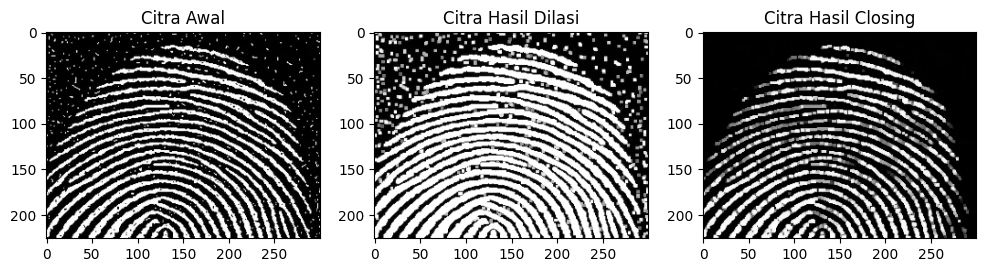

In [ ]:
img4 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Erosi
kernel = np.ones((3,3),np.uint8)
erosion = cv.dilate(img3, kernel, iterations=1)

# Opening
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img4, cv.MORPH_CLOSE, kernel)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Closing')

**9 - Dilation Cross 3x3 dan 5x5**

Menggunakan Library CV dengan fungsi morphologyEx (cv.MORPH_DILATE)

SED = Cross 3


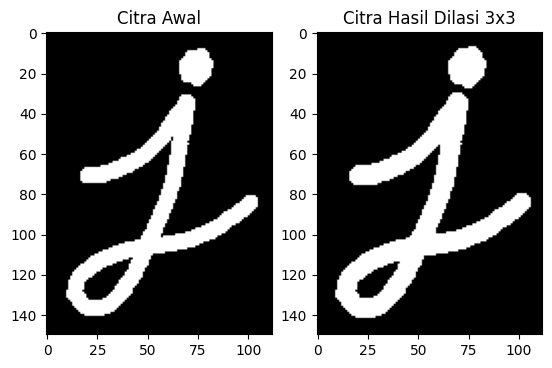

SED = Cross 5


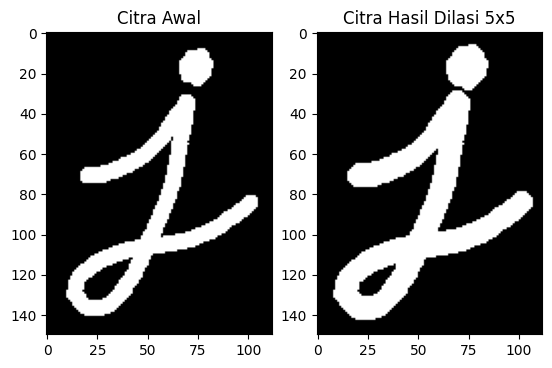

In [ ]:
img5 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)
# Dilation Cross 3x3
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
dilation = cv.morphologyEx(img5, cv.MORPH_DILATE, kernel)

print("SED = Cross 3")
plt.subplot(121), plt.imshow(img5, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi 3x3')
plt.show()

# Dilation Cross 5x5
kernel2 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
dilation2 = cv.morphologyEx(img5, cv.MORPH_DILATE, kernel2)

print("SED = Cross 5")
plt.subplot(121), plt.imshow(img5, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation2, cmap="gray"), plt.title('Citra Hasil Dilasi 5x5')
plt.show()

**10 - Dilation Circular 3x3 dan 5x5**

Menggunakan Library CV dengan fungsi morphologyEx (cv.MORPH_DILATE)

SED = Circle 3


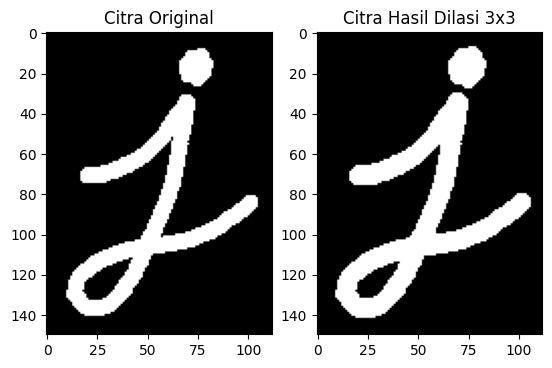

SED = Circle 5


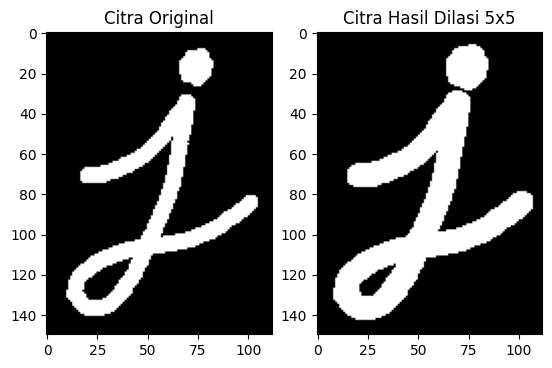

In [ ]:
img6 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
dilation = cv.dilate(img6,kernel,iterations = 1)
 
print("SED = Circle 3")
plt.subplot(121),plt.imshow(img6, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi 3x3')
plt.show()

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
dilation = cv.dilate(img6,kernel,iterations = 1)
print("SED = Circle 5")
plt.subplot(121),plt.imshow(img6, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi 5x5')
plt.show()

Secara Manual tanpa Library


In [ ]:
# Define structuring elements
se1 = np.zeros((3, 3), dtype=np.uint8)
se2 = np.zeros((5, 5), dtype=np.uint8)
cx1 = 1
cy1 = 1
r1 = 1
cx2 = 2
cy2 = 2
r2 = 2
for i in range(se1.shape[0]):
    for j in range(se1.shape[1]):
        if (i-cx1)**2 + (j-cy1)**2 <= r1**2:
            se1[i, j] = 1
for i in range(se2.shape[0]):
    for j in range(se2.shape[1]):
        if (i-cx2)**2 + (j-cy2)**2 <= r2**2:
            se2[i, j] = 1

# Dilation operation using structuring element se1
dilation1 = np.zeros_like(img6)
for i in range(1, img6.shape[0]-1):
    for j in range(1, img6.shape[1]-1):
        temp = img6[i-1:i+2, j-1:j+2]
        product = temp * se1
        dilation1[i, j] = np.max(product)

# Dilation operation using structuring element se2
dilation2 = np.zeros_like(img6)
for i in range(2, img6.shape[0]-2):
    for j in range(2, img6.shape[1]-2):
        temp = img6[i-2:i+3, j-2:j+3]
        product = temp * se2
        dilation2[i, j] = np.max(product)

# Display original and dilated images
print("SED = Cross 3")
plt.subplot(121),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation1, cmap="gray"),plt.title('Citra Dilation Circular 3x3')
plt.show()

print("SED = Cross 5")
plt.subplot(121),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation2, cmap="gray"),plt.title('Citra Dilation Circular 5x5')
plt.show()

**11 - Erotion Rectangle 3x5 dan 5x7**

Menggunakan Library CV dengan fungsi morphologyEx (cv.MORPH_DILATE)

SED = Rectengle 3x5


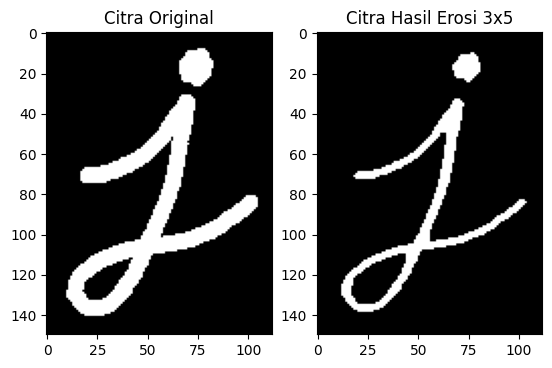

SED = Rectengle 5x7


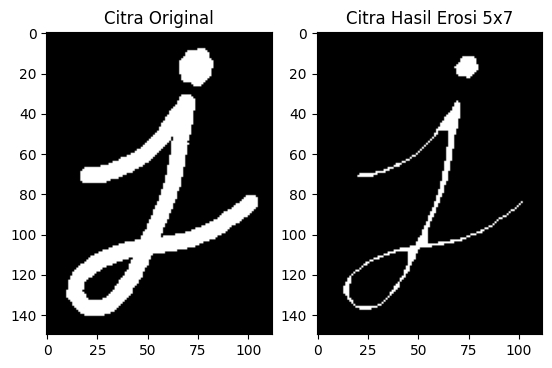

In [ ]:
img7 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,5))
erosion = cv.erode(img7,kernel,iterations = 1)
print("SED = Rectengle 3x5")
plt.subplot(121),plt.imshow(img7, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi 3x5')
plt.show()
 

kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,7))
erosion = cv.erode(img7,kernel,iterations = 1)
print("SED = Rectengle 5x7")
plt.subplot(121),plt.imshow(img7, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi 5x7')
plt.show()

Secara manual tanpa Library

In [ ]:
# Define structuring elements
se1 = np.ones((3, 5), dtype=np.uint8)
se2 = np.ones((5, 7), dtype=np.uint8)

# Erosion operation using structuring element se1
erosion1 = np.zeros_like(img2)
for i in range(3, img2.shape[0]-3):
    for j in range(5, img2.shape[1]-5):
        temp = img2[i-1:i+2, j-2:j+3]
        product = temp * se1
        erosion1[i, j] = np.min(product)

# Erosion operation using structuring element se2
erosion2 = np.zeros_like(img2)
for i in range(5, img2.shape[0]-5):
    for j in range(7, img2.shape[1]-7):
        temp = img2[i-2:i+3, j-3:j+4]
        product = temp * se2
        erosion2[i, j] = np.min(product)

# Display original and eroded images
print("SED = Rectengle 3x5")
plt.subplot(121),plt.imshow(img2, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(erosion1, cmap="gray"),plt.title('Citra Erotion Rectangle 3x5')
plt.show()
print("SED = Rectengle 5x7")
plt.subplot(121),plt.imshow(img2, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(erosion2, cmap="gray"),plt.title('Citra Erotion Rectangle 5x7')
plt.show()

**12 - Erotion Line Vertical 3 dan 5**

Menggunakan Library CV dengan fungsi morphologyEx (cv.MORPH_DILATE)

SE = Line Vertikal 3


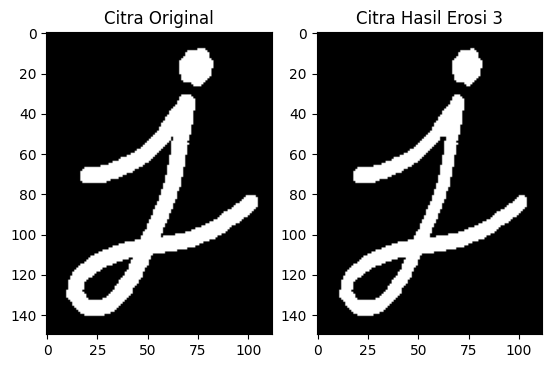

SE = Line Vertikal 3


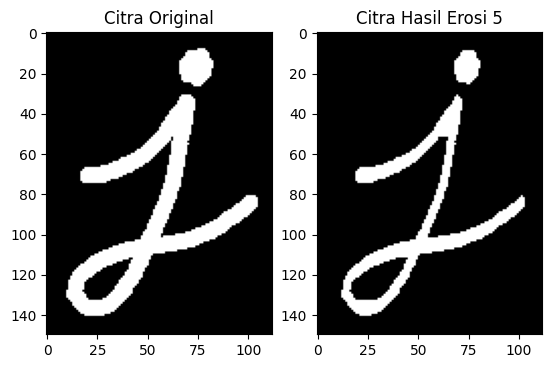

In [ ]:
img8 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,1))
erosion = cv.erode(img8,kernel,iterations = 1)
print("SE = Line Vertikal 3")
plt.subplot(121),plt.imshow(img8, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi 3')
plt.show()

kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,1))
erosion = cv.erode(img8,kernel,iterations = 1)
print("SE = Line Vertikal 3")
plt.subplot(121),plt.imshow(img8, cmap="gray"),plt.title('Citra Original')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi 5')
plt.show()

Secara Manual tanpa Library

In [ ]:
m,n= img2.shape 

k=3
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

imgErode= np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img2[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)

In [ ]:
m,n= img2.shape 

k=5
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

imgErode= np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img2[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)

In [ ]:
print("SE = Line Vertikal 3")
plt.subplot(121), plt.imshow(img2, cmap ="gray"), plt.title('Citra Original')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Erotion Line Vertical 3')
plt.show()
print("SE = Line Vertikal 5")
plt.subplot(121), plt.imshow(img2, cmap ="gray"), plt.title('Citra Original')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Erotion Line Vertical 5')
plt.show()